<a href="https://colab.research.google.com/github/algpdmat/Jaccard-index-for-graphs/blob/main/Nutrion_Geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
t2 = [109.5, 1.81, 97.70, 11.8, 10.8, 86]


def calcular_imc(peso, altura):
    imc = peso / (altura ** 2)
    return imc

def classificar_imc(imc):
    if imc < 18.5:
        return "Desnutrido"
    elif 18.5 <= imc < 24.9:
        return "Eutrófico"
    elif 25 <= imc < 29.9:
        return "Sobrepeso"
    elif imc >= 30:
        return "Obeso"

def analisar_gc_sexo(gc, sexo, imc_classificacao):
    if sexo == "Feminino":
        if 16 <= gc <= 30:
            return imc_classificacao
        elif gc > 30:
            return "Falso Magro"
    elif sexo == "Masculino":
        if 6 <= gc <= 24:
            return imc_classificacao
        elif gc > 25:
            return "Falso Magro"
    return imc_classificacao

def analisar_pessoa(peso, altura, mm, mg, gc, cc, sexo):
    imc = calcular_imc(peso, altura)
    imc_classificacao = classificar_imc(imc)

    if imc_classificacao in ["Desnutrido", "Eutrófico"]:
        return analisar_gc_sexo(gc, sexo, imc_classificacao)
    else:
        if sexo == "Feminino" and 16 <= gc <= 30:
            return "Falso Gordo"
        elif sexo == "Feminino" and gc > 30:
            return imc_classificacao
        elif sexo == "Masculino" and 6 <= gc <= 24:
            return "Falso Gordo"
        elif sexo == "Masculino" and gc > 25:
            return imc_classificacao
        else:
            return imc_classificacao

Classificação Pessoa 1: Obeso
Classificação Pessoa 2: Falso Gordo


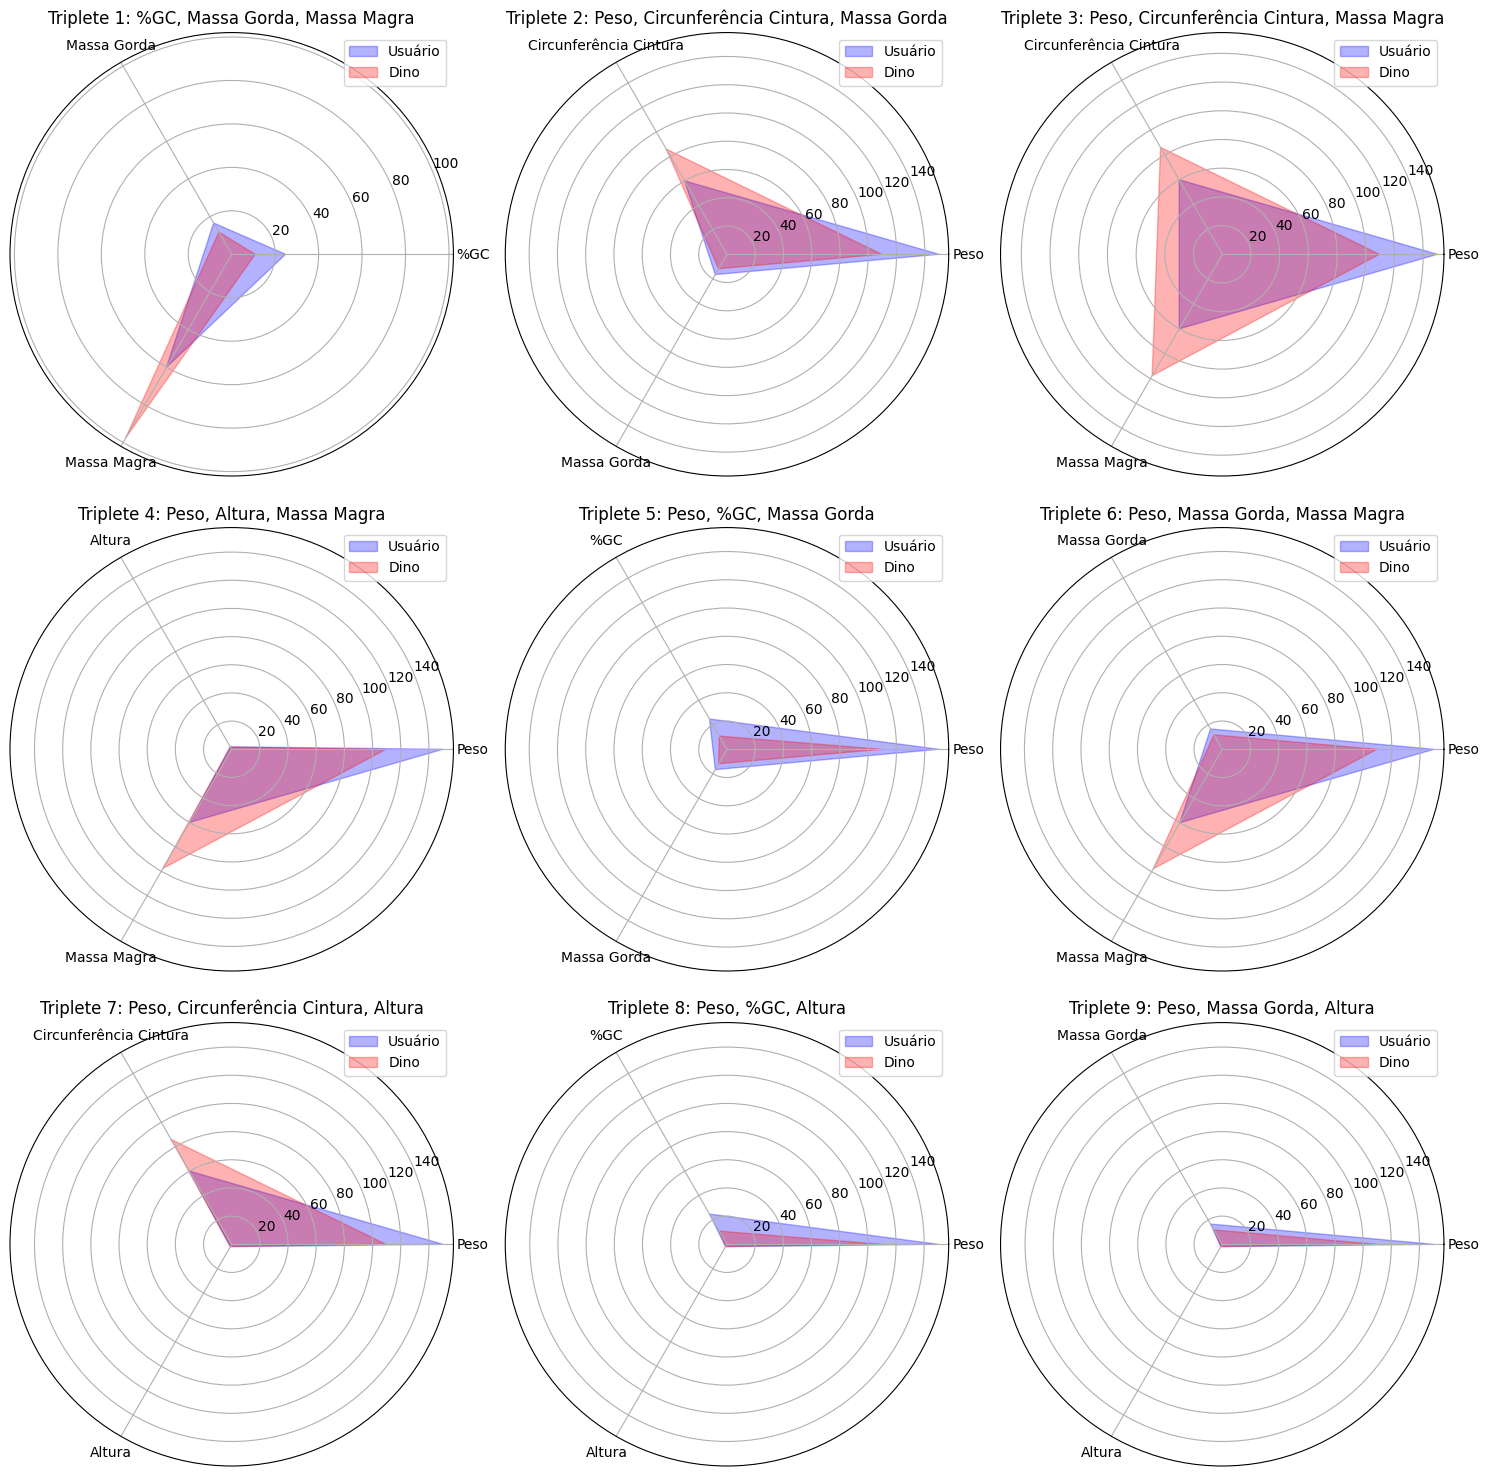

In [3]:
# VERSÃO QUE COMPARA O USUARIO A RAMON DINO
def plot_polar_triplets_comparison(vars1, vars2, custom_plot_names=None):
    triplets = [
        (4, 3, 2),
        (0, 5, 3),
        (0, 5, 2),
        (0, 1, 2),
        (0, 4, 3),
        (0, 3, 2),
        (0, 5, 1),
        (0, 4, 1),
        (0, 3, 1),
    ]

    triplet_names = [
        'Triplete 1: %GC, Massa Gorda, Massa Magra',
        'Triplete 2: Peso, Circunferência Cintura, Massa Gorda',
        'Triplete 3: Peso, Circunferência Cintura, Massa Magra',
        'Triplete 4: Peso, Altura, Massa Magra',
        'Triplete 5: Peso, %GC, Massa Gorda',
        'Triplete 6: Peso, Massa Gorda, Massa Magra',
        'Triplete 7: Peso, Circunferência Cintura, Altura',
        'Triplete 8: Peso, %GC, Altura',
        'Triplete 9: Peso, Massa Gorda, Altura',
    ]

    if custom_plot_names is None:
        custom_plot_names = [[f'Plot {i+1} - A', f'Plot {i+1} - B', f'Plot {i+1} - C'] for i in range(len(triplets))]
    else:
        if len(custom_plot_names) != len(triplets):
            raise ValueError("O número de nomes personalizados de plots não corresponde ao número de plots.")

    fig, axs = plt.subplots(3, 3, subplot_kw=dict(polar=True), figsize=(15, 15))

    for i, indices in enumerate(triplets):
        ax = axs[i//3, i%3]
        angles = np.linspace(0, 2 * np.pi, 4)[:3]

        radii = np.array([vars1[index] for index in indices])
        angles_with_closure = np.append(angles, angles[0])
        radii_with_closure = np.append(radii, radii[0])
        ax.fill(angles_with_closure, radii_with_closure, color='blue', alpha=0.3, label='Usuário')

        radii = np.array([vars2[index] for index in indices])
        angles_with_closure = np.append(angles, angles[0])
        radii_with_closure = np.append(radii, radii[0])
        ax.fill(angles_with_closure, radii_with_closure, color='red', alpha=0.3, label='Dino')

        ax.set_title(triplet_names[i])

        vertex_names = custom_plot_names[i]
        custom_angles = [0, 2 * np.pi / 3, 4 * np.pi / 3]
        custom_labels = vertex_names

        ax.set_xticks(custom_angles)
        ax.set_xticklabels(custom_labels)

        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


def analisar_e_plotar(pessoa1, sexo1):
    # Dados fixos da pessoa 2
    t2 = [109.5, 1.81, 97.70, 11.8, 10.8, 86]
    sexo2 = "Masculino"  # ou "Masculino", dependendo do que você deseja

    resultado1 = analisar_pessoa(*pessoa1, sexo1)
    resultado2 = analisar_pessoa(*t2, sexo2)

    print(f"Classificação Pessoa 1: {resultado1}")
    print(f"Classificação Pessoa 2: {resultado2}")

    custom_names = [
        ['%GC', 'Massa Gorda', 'Massa Magra'],
        ['Peso', 'Circunferência Cintura', 'Massa Gorda'],
        ['Peso', 'Circunferência Cintura', 'Massa Magra'],
        ['Peso', 'Altura', 'Massa Magra'],
        ['Peso', '%GC', 'Massa Gorda'],
        ['Peso', 'Massa Gorda', 'Massa Magra'],
        ['Peso', 'Circunferência Cintura', 'Altura'],
        ['Peso', '%GC', 'Altura'],
        ['Peso', 'Massa Gorda', 'Altura']
    ]

    plot_polar_triplets_comparison(pessoa1, t2, custom_plot_names=custom_names)

# COLOQUE AQUI SUAS MEDIDAS
t1 = [150, 2.0, 60.02, 16.63, 24.8, 60]

analisar_e_plotar(t1, "Masculino")


In [ ]:
#VERSÃO QUE CLASSIFICA O USUARIO INDIVIDUAL


def plot_polar_triplets_user(vars1, user_name, custom_plot_names=None):
    triplets = [
        (4, 3, 2),
        (0, 5, 3),
        (0, 5, 2),
        (0, 1, 2),
        (0, 4, 3),
        (0, 3, 2),
        (0, 5, 1),
        (0, 4, 1),
        (0, 3, 1),
    ]

    triplet_names = [
        'Triplete 1: %GC, Massa Gorda, Massa Magra',
        'Triplete 2: Peso, Circunferência Cintura, Massa Gorda',
        'Triplete 3: Peso, Circunferência Cintura, Massa Magra',
        'Triplete 4: Peso, Altura, Massa Magra',
        'Triplete 5: Peso, %GC, Massa Gorda',
        'Triplete 6: Peso, Massa Gorda, Massa Magra',
        'Triplete 7: Peso, Circunferência Cintura, Altura',
        'Triplete 8: Peso, %GC, Altura',
        'Triplete 9: Peso, Massa Gorda, Altura',
    ]
    if custom_plot_names is None:
        custom_plot_names = [[f'Plot {i+1} - A', f'Plot {i+1} - B', f'Plot {i+1} - C'] for i in range(len(triplets))]
    else:
        if len(custom_plot_names) != len(triplets):
            raise ValueError("O número de nomes personalizados de plots não corresponde ao número de plots.")

    fig, axs = plt.subplots(3, 3, subplot_kw=dict(polar=True), figsize=(15, 15))

    for i, indices in enumerate(triplets):
        ax = axs[i//3, i%3]
        angles = np.linspace(0, 2 * np.pi, 4)[:3]

        radii = np.array([vars1[index] for index in indices])
        angles_with_closure = np.append(angles, angles[0])
        radii_with_closure = np.append(radii, radii[0])
        ax.fill(angles_with_closure, radii_with_closure, color='blue', alpha=0.3, label=user_name)

        ax.set_title(triplet_names[i])

        vertex_names = custom_plot_names[i]
        custom_angles = [0, 2 * np.pi / 3, 4 * np.pi / 3]
        custom_labels = vertex_names

        ax.set_xticks(custom_angles)
        ax.set_xticklabels(custom_labels)

        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

def analisar_e_plotar_usuario(t1, sexo, nome):
    resultado = analisar_pessoa(*t1, sexo)
    print(f"Classificação de {nome}: {resultado}")

    custom_names = [['%GC', 'Massa Gorda', 'Massa Magra'],
              ['Peso', 'Circunferência Cintura', 'Massa Gorda'],
              ['Peso', 'Circunferência Cintura', 'Massa Magra'],
              ['Peso', 'Altura', 'Massa Magra'],
              ['Peso', '%GC', 'Massa Gorda'],
              ['Peso', 'Massa Gorda', 'Massa Magra'],
              ['Peso', 'Circunferência Cintura', 'Altura'],
              ['Peso', '%GC', 'Altura'],
              ['Peso', 'Massa Gorda', 'Altura']
              ]

    plot_polar_triplets_user(t1, nome, custom_plot_names=custom_names)



Classificação de André: Obeso


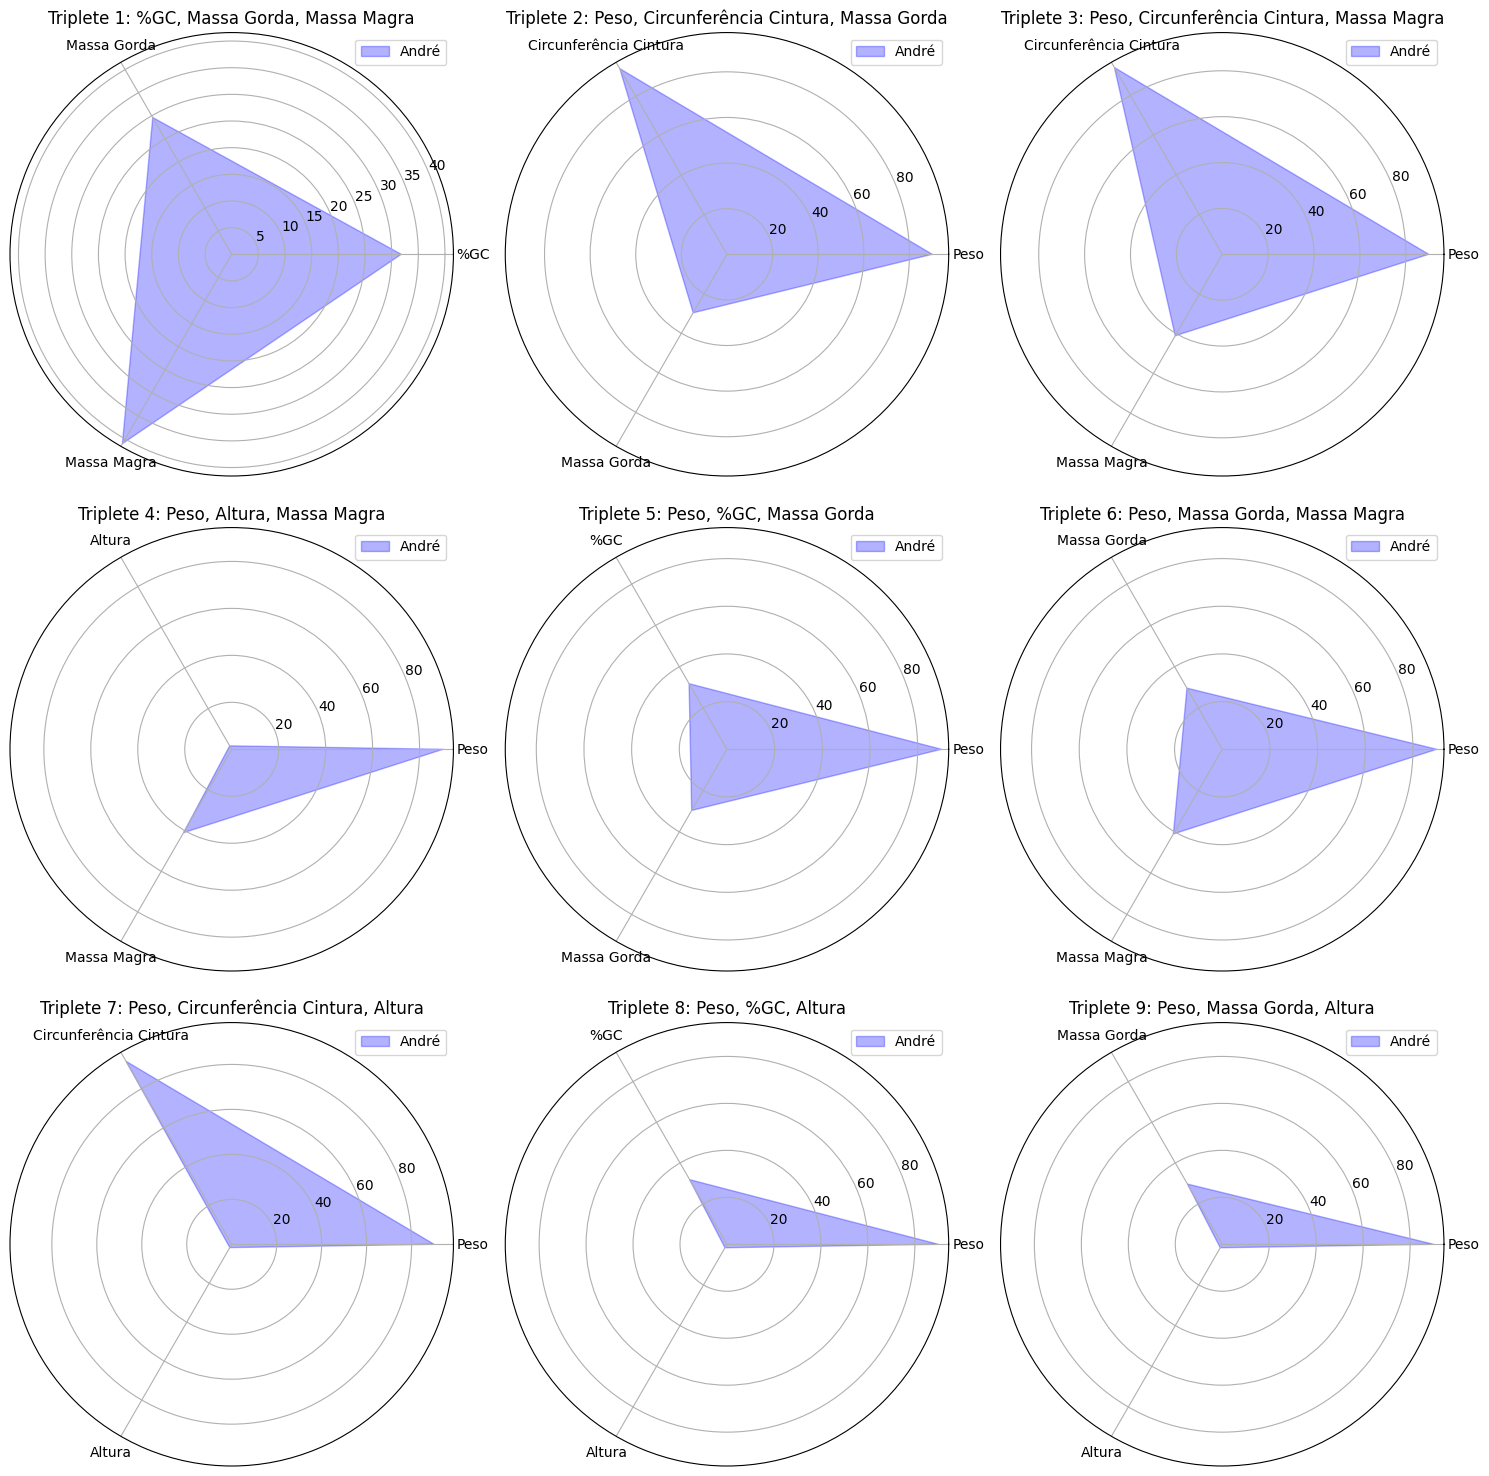

In [ ]:
# TESTE AQUI!

t1_usuario = [90, 1.71, 41.02, 29.63, 31.8, 94]
analisar_e_plotar_usuario(t1_usuario, "Masculino", "André")